<a href="https://colab.research.google.com/github/t1mmb0/Anomaly-Detection-DNN/blob/main/projects/13-3NTXXXX_microcensus_income/mz2010-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('drive/My Drive/mz2010_cf.csv', sep=";", header=0, low_memory=False)

#First Look and Clean Up

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Columns: 427 entries, EF1 to EF1011
dtypes: int64(25), object(402)
memory usage: 76.1+ MB


,EF1,EF3s,EF4s,EF5s,EF7,EF20,EF29,EF30,EF31,EF32,...,EF287,EF366,EF368,EF401,EF402,EF427,EF435,EF436,EF570,EF765
count,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,...,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000,23374.000000
mean,3.018910,3819.733764,1.026397,1.890049,2.732010,2.780098,2.500685,1.043767,1.011423,1.060794,...,6.856892,1.916403,1.063147,2.643151,6.147300,0.247454,0.167708,27.786600,2.307906,2.002567
std,4.014199,2640.870995,0.264462,1.494230,0.510754,2.239612,1.473093,0.258201,0.106268,0.392601,...,2.581395,2.361200,0.243233,1.708267,3.088782,0.543914,0.540753,36.267562,1.847164,1.181762
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1478.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000
50%,1.000000,3396.500000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,8.000000,1.000000,1.000000,3.000000,8.000000,0.000000,0.000000,9.000000,1.000000,2.000000
75%,1.000000,6130.000000,1.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,...,8.000000,1.000000,1.000000,4.000000,8.000000,0.000000,0.000000,19.000000,3.000000,2.000000
max,11.000000,8844.000000,8.000000,40.000000,3.000000,40.000000,4.000000,3.000000,2.000000,4.000000,...,9.000000,8.000000,2.000000,9.000000,9.000000,9.000000,9.000000,99.000000,7.000000,8.000000


In [ ]:
df_original = df

In [ ]:
df = df.filter(regex="EF73|EF74") #keep only columns related to the primary earner

In [ ]:
df = df.apply(pd.to_numeric, errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EF731   23107 non-null  float64
 1   EF734   23107 non-null  float64
 2   EF735   23107 non-null  float64
 3   EF736   23107 non-null  float64
 4   EF737   15655 non-null  float64
 5   EF739   15651 non-null  float64
 6   EF740   15655 non-null  float64
 7   EF741   23107 non-null  float64
 8   EF742   23107 non-null  float64
 9   EF743   23107 non-null  float64
 10  EF745   23079 non-null  float64
 11  EF746   23107 non-null  float64
 12  EF747   23107 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


Dropping all empty samples (collective accomodation)

In [ ]:
df.isnull().sum(axis = 0)

,0
EF731,267
EF734,267
EF735,267
EF736,267
EF737,7719
EF739,7723
EF740,7719
EF741,267
EF742,267
EF743,267


In [ ]:
cols = df.columns
mask = df[cols].isnull().all(axis=1)
df = df[~mask]
mask_no_occupation = df[["EF737","EF739","EF740"]].isnull().all(axis=1)
df_no_occupation = df[mask_no_occupation]

In [ ]:
df_empty_samples = df_original[mask]

In [ ]:
df_empty_samples["EF31"].describe()

,EF31
count,267.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


All individuals for whom all information regarding the main income earner is missing live in collective accommodations.

A more detailed analysis of the group for which the characteristics (EF737–EF741) show no expression.

In [ ]:
livelihood_mapping = {1 : "income",
                      2 : "unemployment ben. (ALG1)",
                      3 : "pension",
                      4 : "income of relatives",
                      5 : "assets",
                      6 : "basic income support",
                      7 : "unemployment ben. (Hartz IV)",
                      8 : "other (BAFÖG, scholarship,...)",
                      9 : "parental ben."}
sex_mapping = {1 : "male",
               2 : "female"}

In [ ]:
df_no_occupation["livelihood"] = df_no_occupation["EF741"].map(livelihood_mapping)
df_no_occupation["sex"] = df_no_occupation["EF731"].map(sex_mapping)
counts = df_no_occupation.groupby(["sex","livelihood"]).size().reset_index(name="count")
sum = counts.groupby('sex')['count'].transform('sum')
counts['proportion'] = counts['count'] / sum
print(counts)

       sex                      livelihood  count  proportion
0   female                          assets     35    0.013328
1   female            basic income support     25    0.009520
2   female                          income      1    0.000381
3   female             income of relatives    111    0.042270
4   female  other (BAFÖG, scholarship,...)     47    0.017898
5   female                   parental ben.     18    0.006855
6   female                         pension   1847    0.703351
7   female        unemployment ben. (ALG1)     55    0.020944
8   female    unemployment ben. (Hartz IV)    487    0.185453
9     male                          assets     57    0.011811
10    male            basic income support     23    0.004766
11    male                          income      7    0.001450
12    male             income of relatives     88    0.018235
13    male  other (BAFÖG, scholarship,...)     68    0.014090
14    male                         pension   3894    0.806879
15    ma

<ipython-input-115-420df40cd8a0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-420df40cd8a0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(df_no_occupation["sex"].value_counts())

sex
male      4826
female    2626
Name: count, dtype: int64


In [ ]:
import plotly.express as px
fig = px.scatter(counts,
                 x = "livelihood",
                 y = "sex",
                 size = "proportion",
                 color = "sex",
                 size_max = 80,
                 title = "Distribution of types of livelihood by gender")
fig.show()

#Basic analysis of the Features for the data subset

martial status

In [ ]:
map = {1: "ledig",
       2: "v. zl.",
       3: "v. gl.",
       4: "gesch.",
       5: "witw.",
       6: "e.LP. zl.",
       7: "e.LP. gt.",
       8: "e.LP. aufg./verst."}

In [ ]:
df["m_status"] = df["EF735"].map(map)

<Axes: xlabel='m_status', ylabel='count'>

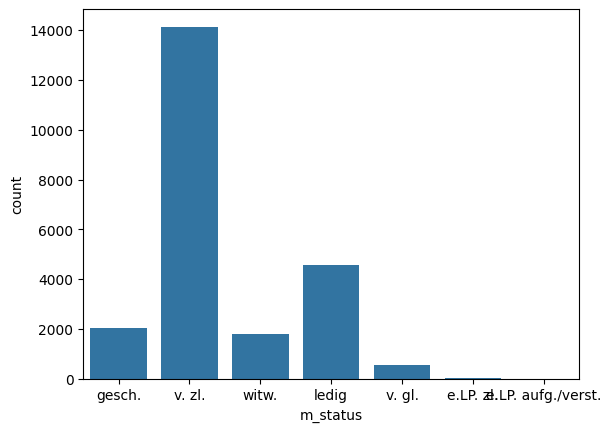

In [ ]:
import seaborn as sns
sns.countplot(data = df, x = "m_status")